In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(labels=['quality'], axis=1),
                                                    df['quality'],test_size=0.3,random_state=0)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print("Linear regression training score",np.sqrt(mean_squared_error(Y_train,lin_reg.predict(X_train))))
print("Linear regression test score",np.sqrt(mean_squared_error(Y_test,lin_reg.predict(X_test))))

Linear regression training score 0.652797804315173
Linear regression test score 0.6330721652189466


In [29]:
lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

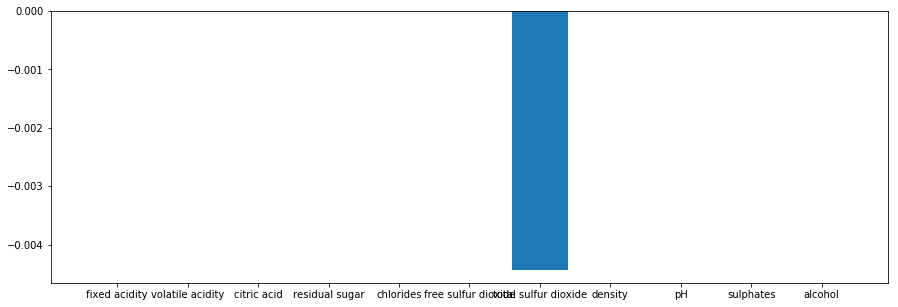

In [61]:
plt.figure(figsize=(15,5))
ax = plt.bar(X_train.columns,lasso_reg.coef_)

It eliminate coef value and make that to 0

In [30]:
print("Lasso regression training score",np.sqrt(mean_squared_error(Y_train,lasso_reg.predict(X_train))))
print("Lasso regression test score",np.sqrt(mean_squared_error(Y_test,lasso_reg.predict(X_test))))

Lasso regression training score 0.8067734505146947
Lasso regression test score 0.7620810661216902


In [39]:
ridge_reg = Ridge(alpha=0.6)
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

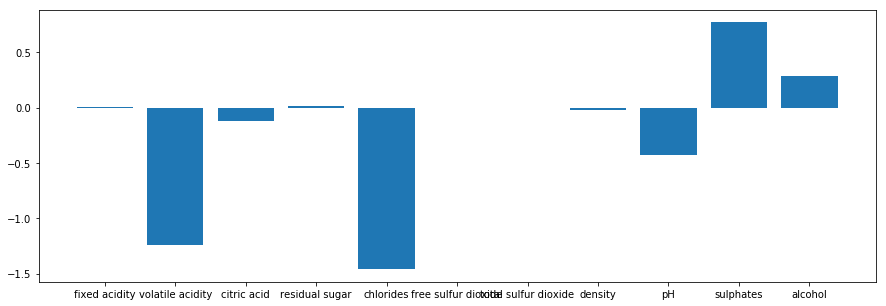

In [60]:
plt.figure(figsize=(15,5))
ax = plt.bar(X_train.columns,ridge_reg.coef_)

It does not eliminate but make priority very low. only 2 variable are imp.

In [38]:
print("Ridge regression training score",np.sqrt(mean_squared_error(Y_train,ridge_reg.predict(X_train))))
print("Ridge regression test score",np.sqrt(mean_squared_error(Y_test,ridge_reg.predict(X_test))))

Ridge regression training score 0.6531460323883033
Ridge regression test score 0.6332581875088819
